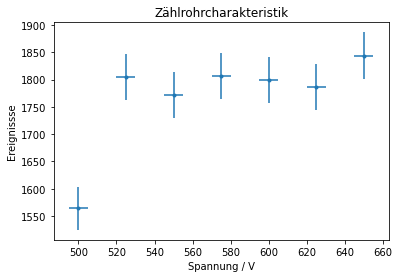

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, pi, sqrt
from scipy.special import gamma
from scipy.stats import chi2

U, U_err, N = np.genfromtxt('251-1.csv', delimiter=";", unpack = True)
N_err = np.sqrt(N)

plt.errorbar(U, N, yerr = N_err, xerr = U_err, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
_ = plt.title('Zählrohrcharakteristik')

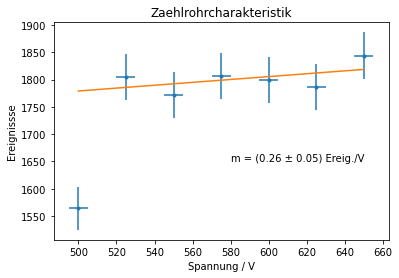

In [2]:
def linear(x,a,b):
    return a*x + b

popt, pcov = curve_fit(linear, U[1:], N[1:], sigma = N_err[1:])

plt.errorbar(U, N, N_err, xerr = U_err, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zaehlrohrcharakteristik')
plt.plot(U, linear(U,*popt))
plt.text(580, 1650, 'm = ({0:.2f} ± {1:.2f}) Ereig./V'.format(popt[0],pcov[0][0]))
plt.savefig("251-1.jpeg")

In [3]:
#Auswertung Aufgabe 2

n_1 = np.array([6951, 7276])
n_3 = np.array([20878, 22197])

del_n_1 = np.diff(n_1)[0]
del_n_3 = np.diff(n_3)[0]

del_n_1_err = sqrt(np.sum(n_1))
del_n_3_err = sqrt(np.sum(n_3))

print('1 Minute:')
print('Anstieg um ({0} ± {1}) Ereignisse'.format(round(del_n_1, -1), int(round(del_n_1_err, -1))))
print('Prozentual: ({0:.1f} ± {1:.1f})%'.format(del_n_1 / n_1[0] * 10**2, n_1[1] / n_1[0] * sqrt(np.sum(1 / n_1)) * 10**2))
print('Der Anstieg ist somit nicht signifikant, da die beiden Messwerte um {0:.1f} σ abweichen.'.format(del_n_1 / del_n_1_err))
print('')
print('3 Minuten:')
print('Anstieg um ({0} ± {1}) Ereignisse'.format(round(del_n_3, -1), int(round(del_n_3_err, -1))))
print('Prozentual: ({0:.1f} ± {1:.1f})%'.format(del_n_3 / n_3[0] * 10**2, n_3[1] / n_3[0] * sqrt(np.sum(1 / n_3)) * 10**2))
print('Der Anstieg ist somit signifikant, da die beiden Messwerte um {0:.1f} σ abweichen.'.format(del_n_3 / del_n_3_err))

1 Minute:
Anstieg um (320 ± 120) Ereignisse
Prozentual: (4.7 ± 1.8)%
Der Anstieg ist somit nicht signifikant, da die beiden Messwerte um 2.7 σ abweichen.

3 Minuten:
Anstieg um (1320 ± 210) Ereignisse
Prozentual: (6.3 ± 1.0)%
Der Anstieg ist somit signifikant, da die beiden Messwerte um 6.4 σ abweichen.


In [4]:
k_0 = (n_3[0] - n_1[0]) / 2 * 60 #in h
k_0_err = sqrt(n_3[0] + n_1[0]) / 2 * 60

k_100 = (n_3[1] - n_1[1]) / 2 * 60
k_100_err = sqrt(n_3[1] + n_1[1]) / 2 * 60

t = 10**4 * (k_100 + k_0) / (k_100 - k_0)**2
t_err = 10**4 * sqrt(((k_100 + 3 * k_0)**2 * k_100_err**2 + (k_0 + 3 * k_100)**2 * k_0_err**2) / (k_100 - k_0)**6)

print('Messzeit um Plateau-Anstieg auf 1% genau zu kennen: ({0:.0f} ± {1:.0f})h'.format(t, t_err))

Messzeit um Plateau-Anstieg auf 1% genau zu kennen: (10 ± 5)h


In [5]:
print('1 Minute:')
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: {0:.2f}%'.format(10**2 / sqrt(n_1[0])))
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: {0:.2f}%'.format(10**2 * 2 / sqrt(n_1[0])))

print('')

print('3 Minuten:')
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: {0:.2f}%'.format(10**2 / sqrt(n_3[0])))
print('Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V\nvom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: {0:.2f}%'.format(10**2 * 2 / sqrt(n_3[0])))

1 Minute:
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: 1.20%
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: 2.40%

3 Minuten:
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 68%: 0.69%
Mögliche prozentuelle Abweichung des Messwertes bei U_0+100V
vom Messwert bei U_0 bei einem Vertrauensniveau bei 95%: 1.38%


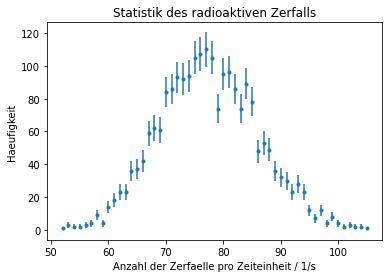

In [6]:
anzahl, haeufigkeit = np.loadtxt('251-2.dat', unpack=True)
fehler = sqrt(haeufigkeit)

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
_ = plt.title('Statistik des radioaktiven Zerfalls')

30


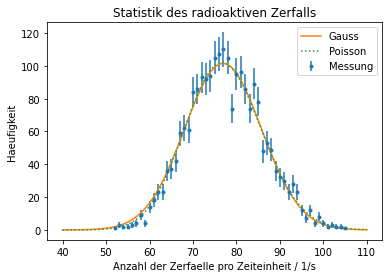

In [7]:
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

popt, pcov = curve_fit(gaussian,anzahl[12:-12], haeufigkeit[12:-12], p0 = [2000,75,8], sigma = fehler[12:-12])

def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[12:-12], haeufigkeit[12:-12], p0=[2000, 75], sigma=fehler[12:-12])

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x = np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
plt.legend()
plt.savefig("251-2.jpeg")

print(len(anzahl[12:-12]))

In [8]:
print("Gaussfit:")
print("A = ({0} ± {1})/s".format(int(round(popt[0],-1)), int(round(sqrt(pcov[0][0]), -1))))
print("mu = ({0:.2f} ± {1:.2f})/s".format(popt[1], sqrt(pcov[1][1])))
print("sig = ({0:.2f} ± {1:.2f})/s".format(popt[2], sqrt(pcov[2][2])))
print('')
print("Poissonfit:")
print("A_p = ({0} ± {1})/s".format(int(round(popt_p[0],-1)), int(round(sqrt(pcov_p[0][0]), -1))))
print("mu_p = ({0:.2f} ± {1:.2f})/s".format(popt_p[1], sqrt(pcov_p[1][1])))

Gaussfit:
A = (2250 ± 50)/s
mu = (76.91 ± 0.24)/s
sig = (8.86 ± 0.27)/s

Poissonfit:
A_p = (2240 ± 50)/s
mu_p = (77.18 ± 0.22)/s


In [9]:
#Gauss:
chi2_g = np.sum((gaussian(anzahl[12:-12],*popt) - haeufigkeit[12:-12])**2 / fehler[12:-12]**2)
dof_g = len(anzahl[12:-12]) - 3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g = chi2_g/dof_g
print("chi2_g = {0:.2f}".format(chi2_g))
print("chi2_red_g = {0:.2f}".format(chi2_red_g))

#Poisson:
chi2_p = np.sum((poisson(anzahl[12:-12],*popt_p) - haeufigkeit[12:-12])**2 / fehler[12:-12]**2)
dof_p = len(anzahl[12:-12])-2 #poisson hat nur 2 Parameter
chi2_red_p = chi2_p/dof_p
print("chi2_p = {0:.2f}".format(chi2_p))
print("chi2_red_p = {0:.2f}".format(chi2_red_p))

chi2_g = 25.19
chi2_red_g = 0.93
chi2_p = 24.25
chi2_red_p = 0.87


In [10]:
#Gauss:
prob_g = round(1-chi2.cdf(chi2_g,dof_g),2) * 100

#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2) * 100

print("Wahrscheinlichkeit Gauss = {0:.1f}%".format(prob_g))
print("Wahrscheinlichkeit Poisson = {0:.1f}%".format(prob_p))

Wahrscheinlichkeit Gauss = 56.0%
Wahrscheinlichkeit Poisson = 67.0%


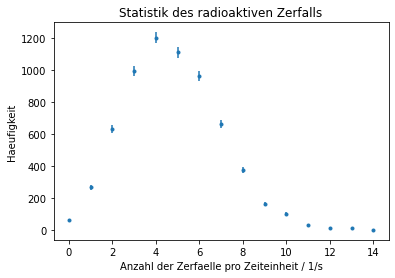

In [11]:
anzahl, haeufigkeit = np.loadtxt('251-3.dat', unpack=True)
fehler = sqrt(haeufigkeit)

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
_ = plt.title('Statistik des radioaktiven Zerfalls')

7


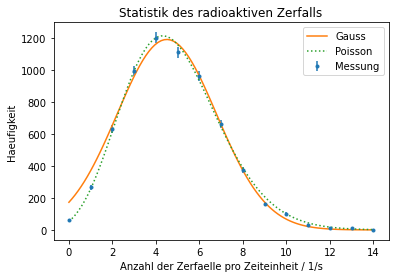

In [12]:
popt, pcov = curve_fit(gaussian, anzahl[2:-6], haeufigkeit[2:-6], p0 = [200, 4, 1], sigma = fehler[2:-6])
popt_p, pcov_p = curve_fit(poisson, anzahl[2:-6], haeufigkeit[2:-6], p0=[200, 4], sigma=fehler[2:-6])

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x = np.linspace(0, 14, 100)
plt.plot(x, gaussian(x,*popt), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
#plt.yscale('log')
plt.legend()
plt.savefig("251-3.jpeg")

print(len(anzahl[2:-6]))

In [13]:
print("Gaussfit:")
print("A = ({0} ± {1})/s".format(int(round(popt[0],-1)), int(round(sqrt(pcov[0][0]), -1))))
print("mu = ({0:.2f} ± {1:.2f})/s".format(popt[1], sqrt(pcov[1][1])))
print("sig = ({0:.2f} ± {1:.2f})/s".format(popt[2], sqrt(pcov[2][2])))
print('')
print("Poissonfit:")
print("A_p = ({0} ± {1})/s".format(int(round(popt_p[0],-1)), int(round(sqrt(pcov_p[0][0]), -1))))
print("mu_p = ({0:.2f} ± {1:.2f})/s".format(popt_p[1], sqrt(pcov_p[1][1])))

Gaussfit:
A = (6840 ± 140)/s
mu = (4.50 ± 0.05)/s
sig = (2.29 ± 0.06)/s

Poissonfit:
A_p = (6620 ± 80)/s
mu_p = (4.83 ± 0.03)/s


In [14]:
#Gauss:
chi2_g = np.sum((gaussian(anzahl[2:-6],*popt) - haeufigkeit[2:-6])**2 / fehler[2:-6]**2)
dof_g = len(anzahl[2:-6]) - 3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g = chi2_g/dof_g
print("chi2_g = {0:.2f}".format(chi2_g))
print("chi2_red_g = {0:.2f}".format(chi2_red_g))

#Poisson:
chi2_p = np.sum((poisson(anzahl[2:-6],*popt_p) - haeufigkeit[2:-6])**2 / fehler[2:-6]**2)
dof_p = len(anzahl[2:-6]) - 2 #poisson hat nur 2 Parameter
chi2_red_p = chi2_p/dof_p
print("chi2_p = {0:.2f}".format(chi2_p))
print("chi2_red_p = {0:.2f}".format(chi2_red_p))

chi2_g = 6.23
chi2_red_g = 1.56
chi2_p = 4.21
chi2_red_p = 0.84


In [15]:
#Gauss:
prob_g = round(1-chi2.cdf(chi2_g,dof_g),2) * 100

#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2) * 100

print("Wahrscheinlichkeit Gauss = {0:.1f}%".format(prob_g))
print("Wahrscheinlichkeit Poisson = {0:.1f}%".format(prob_p))

Wahrscheinlichkeit Gauss = 18.0%
Wahrscheinlichkeit Poisson = 52.0%
